<a href="https://colab.research.google.com/github/vishva2410/Spam-email-classification-SVM-/blob/main/XG(spam_email)ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head(4)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [3]:
df.isnull().sum()

,0
v1,0
v2,0


In [4]:
le = LabelEncoder()
x =le.fit_transform(df['v1'])
co = CountVectorizer()
y = co.fit_transform(df['v2'])

In [5]:
print(y)

  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1
  (1, 5504)	1
  (1, 4512)	1
  (1, 4318)	1
  (1, 8392)	1
  (1, 5533)	1
  (2, 4087)	1
  (2, 3358)	1
  :	:
  (5570, 4218)	1
  (5570, 8313)	1
  (5570, 1084)	1
  (5570, 4615)	1
  (5570, 7039)	1
  (5570, 3308)	1
  (5570, 7627)	1
  (5570, 1438)	1
  (5570, 5334)	1
  (5570, 2592)	1
  (5570, 8065)	1
  (5570, 1778)	1
  (5570, 7049)	1
  (5570, 2892)	1
  (5570, 3470)	1
  (5570, 1786)	1
  (5570, 3687)	1
  (5570, 4161)	1
  (5570, 903)	1
  (5570, 1546)	1
  (5571, 7756)	1
  (5571, 5244)	1
  (5571, 4225)	2
  (5571, 7885)	1
  (5571, 6505)	1


In [6]:
se = StandardScaler(with_mean = False)
x = se.fit_transform(x.reshape(-1,1))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=32)

In [18]:
imbalance_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # 5005 / 9
model = xg.XGBClassifier(scale_pos_weight=imbalance_ratio)  # Balance classes
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred = model.predict(x_test)

In [20]:
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [17]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5005, 1: 9}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


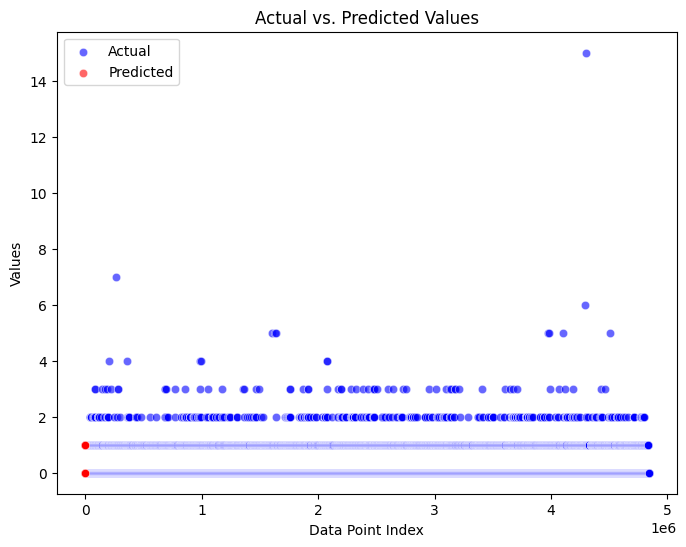

In [26]:
y_test_1d = y_test.toarray().flatten() if not isinstance(y_test, np.ndarray) else y_test.flatten()
y_pred_1d = y_pred.flatten() if not isinstance(y_pred, np.ndarray) else y_pred.flatten()

plt.figure(figsize=(8, 6))

sns.scatterplot(x=np.arange(len(y_test_1d)), y=y_test_1d, color='blue', label='Actual', alpha=0.6)
sns.scatterplot(x=np.arange(len(y_pred_1d)), y=y_pred_1d, color='red', label='Predicted', alpha=0.6)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def give_metrics_for_this(y_true, y_pred):
  """
  Calculates and returns a dictionary of classification metrics.

  Args:
    y_true: The true target values.
    y_pred: The predicted target values.

  Returns:
    A dictionary containing the following metrics:
      - accuracy: The accuracy score.
      - precision: The precision score.
      - recall: The recall score.
      - f1: The F1 score.
  """
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted') # Handle multi-class
  recall = recall_score(y_true, y_pred, average='weighted') # Handle multi-class
  f1 = f1_score(y_true, y_pred, average='weighted') # Handle multi-class

  return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Example usage:
metrics = give_metrics_for_this(y_test_binary, y_pred_binary) # Assuming you have these variables
print(metrics)

{'accuracy': 0.0017921146953405018, 'precision': 2.7570995312930797e-05, 'recall': 0.0017921146953405018, 'f1': 5.430650591940915e-05}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [37]:
model = xg.XGBClassifier(scale_pos_weight=5005/9)  # Adjust weight based on class imbalance


In [38]:
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(x_test)

In [42]:
y_pred_1d = y_pred.flatten() if not isinstance(y_pred, np.ndarray) else y_pred.flatten()
y_pred_1d

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


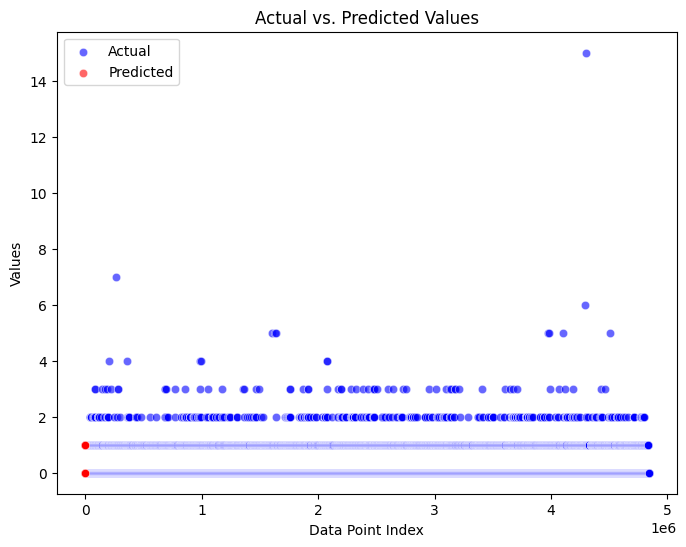

In [43]:
y_test_1d = y_test.toarray().flatten() if not isinstance(y_test, np.ndarray) else y_test.flatten()
y_pred_1d = y_pred.flatten() if not isinstance(y_pred, np.ndarray) else y_pred.flatten()

plt.figure(figsize=(8, 6))

sns.scatterplot(x=np.arange(len(y_test_1d)), y=y_test_1d, color='blue', label='Actual', alpha=0.6)
sns.scatterplot(x=np.arange(len(y_pred_1d)), y=y_pred_1d, color='red', label='Predicted', alpha=0.6)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [46]:
# Ensure labels are binary (adjust this based on your actual data)
y_test = (y_test > 0).astype(int)
y_pred = (y_pred > 0).astype(int)


In [48]:
import numpy as np
y_test = np.array(y_test)
y_pred = np.array(y_pred)


In [60]:
import numpy as np

# Extract the sparse matrix if y_test is stored inside an array
if isinstance(y_test[0], np.ndarray) or hasattr(y_test[0], "toarray"):
    y_test = y_test[0].toarray()  # Convert sparse matrix to dense array

# Flatten it into a 1D array
y_test = np.ravel(y_test)

print("y_test shape after fix:", y_test.shape)


y_test shape after fix: (4838976,)


In [61]:
print("Final y_test shape:", y_test.shape)
print("Final y_pred shape:", y_pred.shape)


Final y_test shape: (4838976,)
Final y_pred shape: (558,)


In [64]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure y_test is correctly extracted
if hasattr(y_test, "toarray"):  # If it's a sparse matrix
    y_test = y_test.toarray().flatten()  # Convert to dense and flatten
else:
    y_test = np.array(y_test).flatten()  # Ensure it's a flat numpy array

# Ensure y_test and y_pred have matching sizes
if y_test.shape[0] != y_pred.shape[0]:
    print(f"Shape mismatch: y_test ({y_test.shape[0]}) vs. y_pred ({y_pred.shape[0]})")
else:
    # Compute metrics if shapes match
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)

    print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}")


Shape mismatch: y_test (4838976) vs. y_pred (558)
